In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import plot_partregress
import geopandas as gpd
import plotly.express as px
from matplotlib.patches import Patch

In [2]:
data = pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\DF_landscape.dta')

In [3]:
data['commitment_conusd5'] = data['commitment_conusd1'] + data['commitment_conusd2'] + data['commitment_conusd3'] + data['commitment_conusd4']

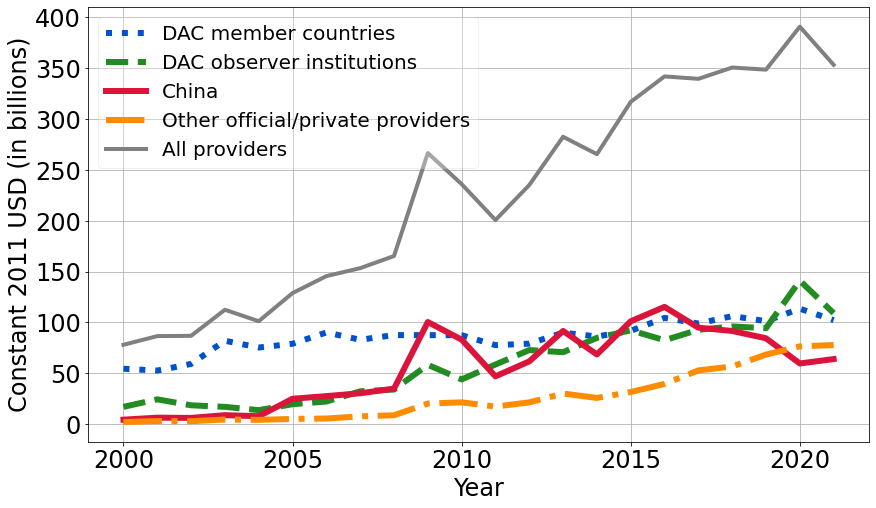

In [4]:
colors = {1: '#0052CC',  # Strong Blue
          2: '#228B22',  # Forest Green
          3: '#DC143C',  # Crimson
          4: '#FF8C00'}  # Dark Orange

plt.figure(figsize=(14, 8))
plt.plot(data['year'], data['commitment_conusd1']/1000000000, label='DAC member countries', linewidth=6, color=colors[1], linestyle=':')  # Solid line
plt.plot(data['year'], data['commitment_conusd2']/1000000000, label='DAC observer institutions', linewidth=6, color=colors[2], linestyle='--')  # Dashed line
plt.plot(data['year'], data['commitment_conusd3']/1000000000, label='China', linewidth=6, color=colors[3], linestyle='-')  # Dash-dot line
plt.plot(data['year'], data['commitment_conusd4']/1000000000, label='Other official/private providers', linewidth=6, color=colors[4], linestyle='-.')  # Dotted line
plt.plot(data['year'], data['commitment_conusd5']/1000000000, label='All providers', linewidth=4, color='grey', linestyle='-')  # Added black color for 'All providers' with dashed line
plt.xlabel('Year', fontsize=24)
plt.ylabel('Constant 2011 USD (in billions)', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.legend(fontsize=20, framealpha=0.3)
plt.grid(True)
plt.show()

In [5]:
new_data = pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\aggregate_share_reg.dta')

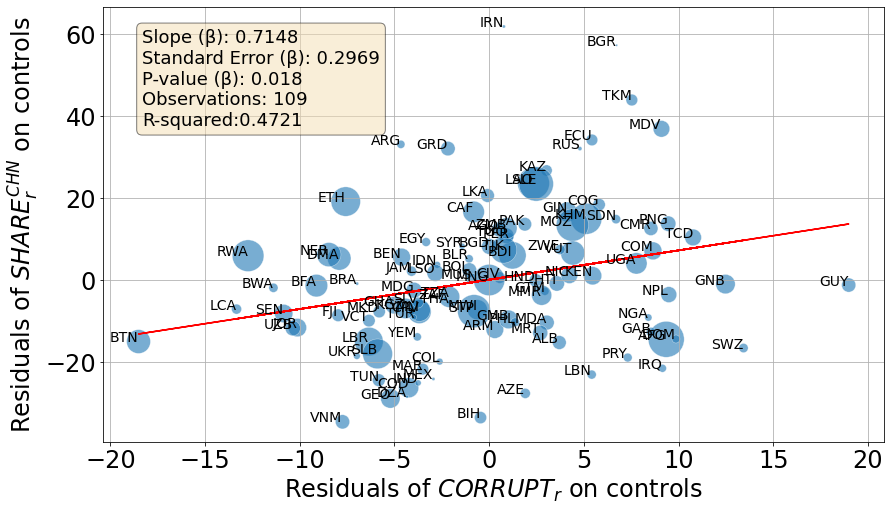

In [6]:
# Recreate the scatter plot with the new data from scratch
plt.figure(figsize=(14, 8))
scatter = plt.scatter(new_data['neg_avgcpi_res'], new_data['chn_share_res'], 
                      s=new_data['df_gdp'] * 1.5,  # Adjust size for visibility
                      alpha=0.6, edgecolors='w', linewidth=0.5)

# Add a linear fit line
m, b = np.polyfit(new_data['neg_avgcpi_res'], new_data['chn_share_res'], 1)
plt.plot(new_data['neg_avgcpi_res'], m*new_data['neg_avgcpi_res'] + b, color='red')

# Annotate each point with the ISO code
for i, row in new_data.iterrows():
    plt.annotate(row['iso_code'], (row['neg_avgcpi_res'], row['chn_share_res']),
                 fontsize=14, ha='right')

# Labels and title
plt.xlabel('Residuals of $CORRUPT_r$ on controls',fontsize=24)
plt.ylabel('Residuals of $SHARE^{CHN}_r$ on controls',fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.grid(True)

textstr = '\n'.join((
    f'Slope (β): 0.7148',
    f'Standard Error (β): 0.2969',
    f'P-value (β): 0.018',
    f'Observations: 109',
    f'R-squared:0.4721',
))

# These are the box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Place the box in the upper left corner
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
          
# Show the plot
plt.show()


In [7]:
df = pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\df_geography.dta')

In [8]:
blue_scale = [
    [0.0, "lightblue"],  # dark blue
    [0.5, "blue"],  # medium blue
    [1.0, "navy"]  # light blue
]

red_scale = [
    [0.0, "salmon"],  # dark red
    [0.5, "red"],  # medium red
    [1.0, "darkred"]  # light red
]

fig1 = px.choropleth(df,
                     locations="iso_code",
                     color="commitment_conusd1",
                     hover_name="iso_code",
                     color_continuous_scale=blue_scale,
                     title="Global Commitment in USD (commitment_conusd1)",
                     labels={'commitment_conusd1': 'Commitment (USD)'},
                     projection="equirectangular")

fig1.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True, 
                 lataxis_range=[-60, 90],  # This line sets the latitude range, excluding most of Antarctica
                 lonaxis_range=[-170, 192])

fig1.update_layout(
    coloraxis_colorbar=dict(
        title="",
        orientation='h',
        x=0.51,
        xanchor='center',
        y=-0.2,
        tickfont=dict(size=24)
    )
)

fig2 = px.choropleth(df,
                     locations="iso_code",
                     color="commitment_conusd3",
                     hover_name="iso_code",
                     color_continuous_scale=red_scale,
                     title="Global Commitment in USD (commitment_conusd3)",
                     labels={'commitment_conusd3': 'Commitment (USD)'},
                     projection="equirectangular")

fig2.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True, 
                 lataxis_range=[-60, 90],  # This line sets the latitude range, excluding most of Antarctica
                 lonaxis_range=[-170, 192])

fig2.update_layout(
    coloraxis_colorbar=dict(
        title="",
        orientation='h',
        x=0.51,
        xanchor='center',
        y=-0.2,
        tickfont=dict(size=24)
    )
)

fig1.update_layout(
    title_text=""
)

fig2.update_layout(
    title_text=""
)


fig1.show()
fig2.show()

In [9]:
df_sector=pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\df_by_sector.dta')

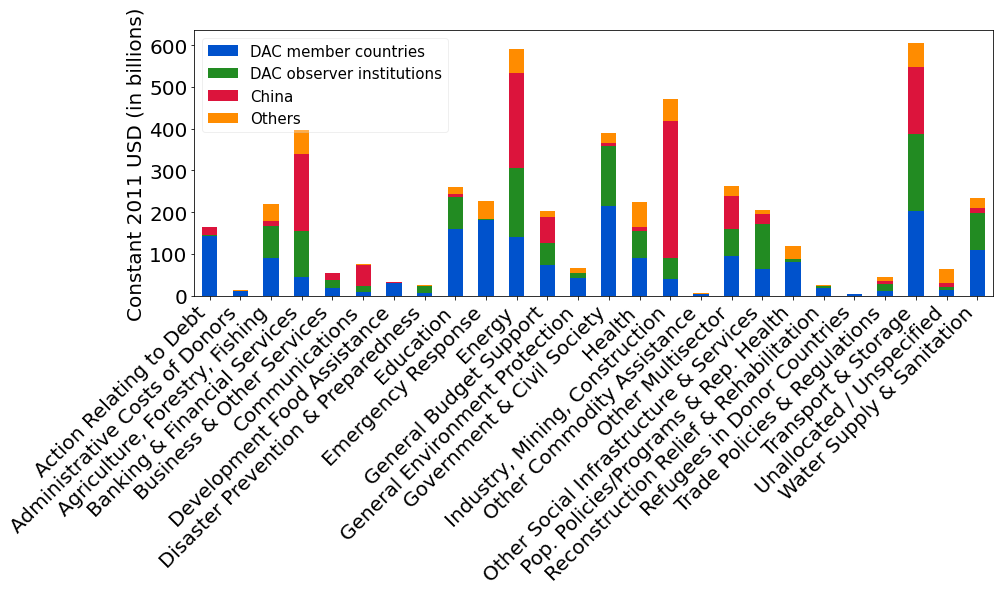

In [10]:
df_sector['commitment_conusd']=df_sector['commitment_conusd']/1000000000
pivot_df = df_sector.pivot_table(values='commitment_conusd', index='sector_name_broad', columns='donor_group', aggfunc='sum', fill_value=0)

# Define custom colors for each donor group
colors = {1: '#0052CC',  # Strong Blue
          2: '#228B22',  # Forest Green
          3: '#DC143C',  # Crimson
          4: '#FF8C00'}  # Dark Orange

# Plotting with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=[colors[x] for x in pivot_df.columns])
plt.xlabel('')
plt.ylabel('Constant 2011 USD (in billions)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=['DAC member countries', 'DAC observer institutions', 'China', 'Others'], fontsize=15, framealpha=0.3)
plt.tight_layout()  # Adjust layout to make room for legend and x-labels
plt.show()

In [28]:
data=pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\bootstrapped.dta')

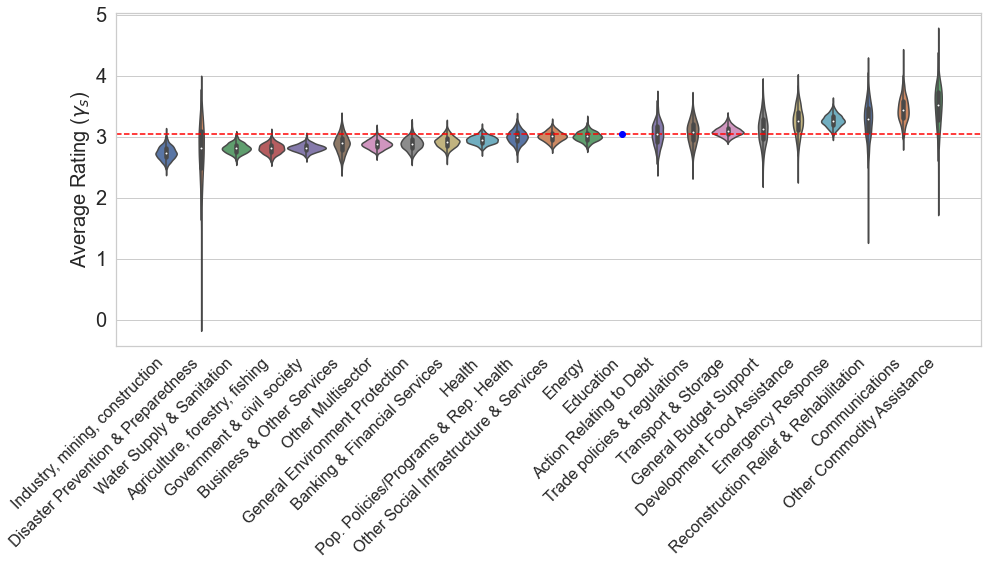

In [39]:
education_data = pd.DataFrame({
    'round': [None],
    '_b_cat_dummy': [None],
    'sector_code_broad': [None],
    'monitor': [0],
    'monitor_se': [None],
    'boot_se': [None],
    'sector_name_broad': ['Education']
})

# Append the education data to the existing dataset
data_with_education = pd.concat([data, education_data], ignore_index=True)

# Fill NaN values in 'monitor' with 0 for correct sorting
data_with_education['monitor'] = data_with_education['monitor'].fillna(0)

# Calculate the mean of the observed estimates for each sector including 'Education'
sector_means_with_education = data_with_education.groupby('sector_name_broad')['monitor'].mean().reset_index()

# Sort the sectors by the mean of the observed estimates including 'Education'
sector_means_sorted_with_education = sector_means_with_education.sort_values(by='monitor')

# Create a sorted order of sectors including 'Education'
sorted_sectors_with_education = sector_means_sorted_with_education['sector_name_broad'].tolist()

# Ensure that numeric values are properly handled for the 'Education' sector
data_with_education['_b_cat_dummy'] = pd.to_numeric(data_with_education['_b_cat_dummy'], errors='coerce').add(3.0392)

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating the violin plot with the Education sector included and sorted correctly
plt.figure(figsize=(14, 8))
sns.violinplot(x="sector_name_broad", y="_b_cat_dummy", data=data_with_education, order=sorted_sectors_with_education, width=1.1, inner='box', palette='deep')

# Adding a reference horizontal line at y=0 for the Education sector
plt.axhline(3.0392, color='red', linestyle='--')

plt.scatter(x=sorted_sectors_with_education.index('Education'), y=3.0392, color='blue', zorder=5)

# Adding titles and labels
plt.xlabel('')
plt.ylabel('Average Rating ($\gamma_s$)', fontsize=20)

# Ensure x-axis ticks are correctly displayed
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=20)
# Display the plot with sorted x-axis by observed estimates and Education sector
plt.tight_layout()
plt.show()

In [13]:
data=pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\quartile_regression.dta')

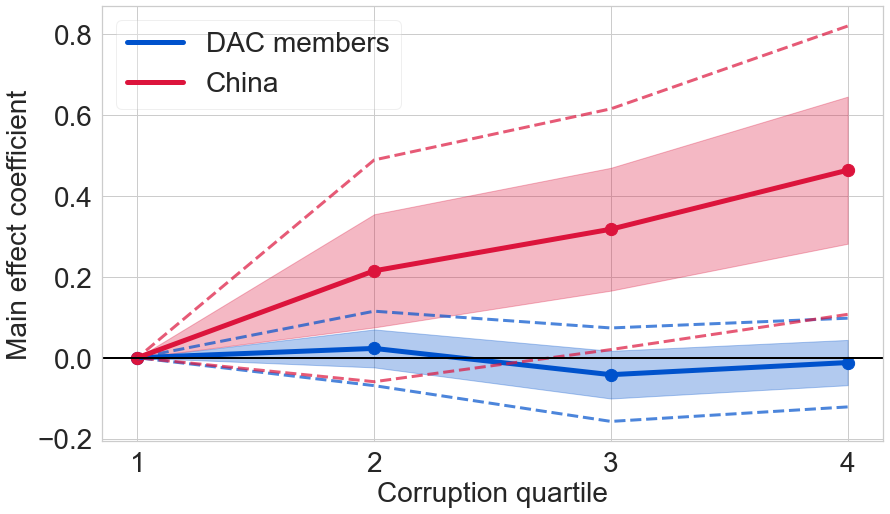

In [14]:
data['corrupt_quart'] = data['corrupt_quart'].astype(np.float64)

# Filter data for DAC members and China
dac_data = data[data['donor'] == 'DAC members'].copy()
china_data = data[data['donor'] == 'China'].copy()

# Calculate 1.96 and 68% confidence intervals for DAC members
dac_data['main_ci_lower'] = dac_data['main'] - 1.96 * dac_data['main_se']
dac_data['main_ci_upper'] = dac_data['main'] + 1.96 * dac_data['main_se']
dac_data['main_ci_lower_68'] = dac_data['main'] - 1.0 * dac_data['main_se']
dac_data['main_ci_upper_68'] = dac_data['main'] + 1.0 * dac_data['main_se']

# Calculate 1.96 and 68% confidence intervals for China
china_data['main_ci_lower'] = china_data['main'] - 1.96 * china_data['main_se']
china_data['main_ci_upper'] = china_data['main'] + 1.96 * china_data['main_se']
china_data['main_ci_lower_68'] = china_data['main'] - 1.0 * china_data['main_se']
china_data['main_ci_upper_68'] = china_data['main'] + 1.0 * china_data['main_se']

# Ensure the data is clean and remove any rows with non-numeric values or NaNs in the relevant columns
dac_data[['corrupt_quart', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68']] = dac_data[['corrupt_quart', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68']].apply(pd.to_numeric, errors='coerce')
china_data[['corrupt_quart', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68']] = china_data[['corrupt_quart', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68']].apply(pd.to_numeric, errors='coerce')

dac_data = dac_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['corrupt_quart', 'main', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68'])
china_data = china_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['corrupt_quart', 'main', 'main_ci_lower', 'main_ci_upper', 'main_ci_lower_68', 'main_ci_upper_68'])

plt.figure(figsize=(14, 8))

# DAC members plot
plt.plot(dac_data['corrupt_quart'], dac_data['main'], label='DAC members', linewidth=5, color='#0052CC', linestyle='-')
plt.fill_between(dac_data['corrupt_quart'], dac_data['main_ci_lower_68'], dac_data['main_ci_upper_68'], color='#0052CC', alpha=0.3)
plt.plot(dac_data['corrupt_quart'], dac_data['main_ci_lower'], linewidth=3, linestyle='--', color='#0052CC', alpha=0.7)
plt.plot(dac_data['corrupt_quart'], dac_data['main_ci_upper'], linewidth=3, linestyle='--', color='#0052CC', alpha=0.7)
# Adding scatter points for DAC members
plt.scatter(dac_data['corrupt_quart'], dac_data['main'], color='#0052CC', s=150, edgecolor='#0052CC')  # Adjust 's' for size

# China plot
plt.plot(china_data['corrupt_quart'], china_data['main'], label='China', linewidth=5, color='#DC143C', linestyle='-')
plt.fill_between(china_data['corrupt_quart'], china_data['main_ci_lower_68'], china_data['main_ci_upper_68'], color='#DC143C', alpha=0.3)
plt.plot(china_data['corrupt_quart'], china_data['main_ci_lower'], linewidth=3, linestyle='--', color='#DC143C', alpha=0.7)
plt.plot(china_data['corrupt_quart'], china_data['main_ci_upper'], linewidth=3, linestyle='--', color='#DC143C', alpha=0.7)
# Adding scatter points for China
plt.scatter(china_data['corrupt_quart'], china_data['main'], color='#DC143C', s=150, edgecolor='#DC143C')  # Adjust 's' for size

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel('Corruption quartile', fontsize=28)
plt.ylabel('Main effect coefficient', fontsize=28)
plt.xticks(ticks=[1, 2, 3, 4], fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28, loc='upper left', framealpha=0.3)
plt.grid(True)
plt.show()

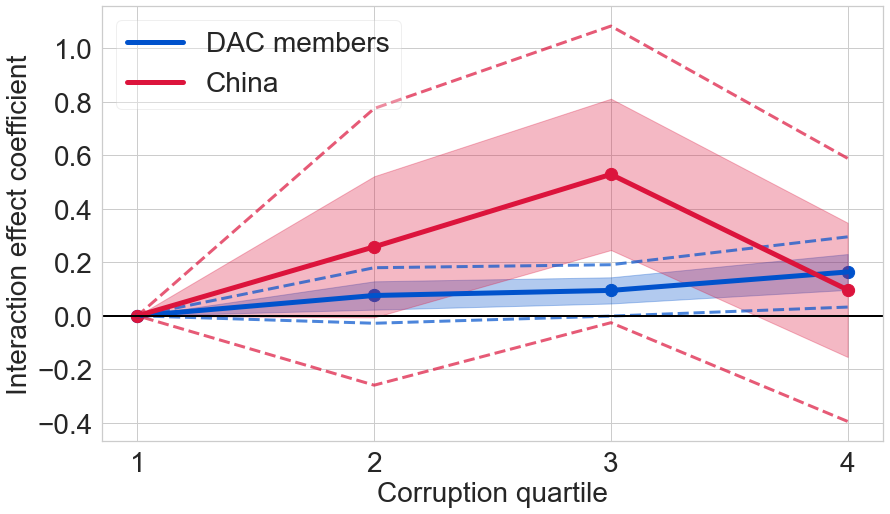

In [15]:
# Filter data for DAC members and China
dac_data = data[data['donor'] == 'DAC members'].copy()
china_data = data[data['donor'] == 'China'].copy()

# Calculate 1.96 and 68% confidence intervals for interaction effect for DAC members
dac_data['interaction_ci_lower'] = dac_data['interaction'] - 1.96 * dac_data['interaction_se']
dac_data['interaction_ci_upper'] = dac_data['interaction'] + 1.96 * dac_data['interaction_se']
dac_data['interaction_ci_lower_68'] = dac_data['interaction'] - 1.0 * dac_data['interaction_se']
dac_data['interaction_ci_upper_68'] = dac_data['interaction'] + 1.0 * dac_data['interaction_se']

# Calculate 1.96 and 68% confidence intervals for interaction effect for China
china_data['interaction_ci_lower'] = china_data['interaction'] - 1.96 * china_data['interaction_se']
china_data['interaction_ci_upper'] = china_data['interaction'] + 1.96 * china_data['interaction_se']
china_data['interaction_ci_lower_68'] = china_data['interaction'] - 1.0 * china_data['interaction_se']
china_data['interaction_ci_upper_68'] = china_data['interaction'] + 1.0 * china_data['interaction_se']

# Ensure the data is clean and remove any rows with non-numeric values or NaNs in the relevant columns
columns_to_check = ['corrupt_quart', 'interaction', 'interaction_ci_lower', 'interaction_ci_upper', 'interaction_ci_lower_68', 'interaction_ci_upper_68']
dac_data[columns_to_check] = dac_data[columns_to_check].apply(pd.to_numeric, errors='coerce')
china_data[columns_to_check] = china_data[columns_to_check].apply(pd.to_numeric, errors='coerce')

dac_data = dac_data.replace([np.inf, -np.inf], np.nan).dropna(subset=columns_to_check)
china_data = china_data.replace([np.inf, -np.inf], np.nan).dropna(subset=columns_to_check)

# Plot with both 1.96 CI and 68% CI for interaction effect
plt.figure(figsize=(14, 8))

# Reference line at zero
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# DAC members plot
plt.plot(dac_data['corrupt_quart'], dac_data['interaction'], label='DAC members', linewidth=5, color='#0052CC', linestyle='-')
plt.fill_between(dac_data['corrupt_quart'], dac_data['interaction_ci_lower_68'], dac_data['interaction_ci_upper_68'], color='#0052CC', alpha=0.3)
plt.plot(dac_data['corrupt_quart'], dac_data['interaction_ci_lower'], linewidth=3, linestyle='--', color='#0052CC', alpha=0.7)
plt.plot(dac_data['corrupt_quart'], dac_data['interaction_ci_upper'], linewidth=3, linestyle='--', color='#0052CC', alpha=0.7)
plt.scatter(dac_data['corrupt_quart'], dac_data['interaction'], color='#0052CC', s=150, edgecolor='#0052CC')
# China plot
plt.plot(china_data['corrupt_quart'], china_data['interaction'], label='China', linewidth=5, color='#DC143C', linestyle='-')
plt.fill_between(china_data['corrupt_quart'], china_data['interaction_ci_lower_68'], china_data['interaction_ci_upper_68'], color='#DC143C', alpha=0.3)
plt.plot(china_data['corrupt_quart'], china_data['interaction_ci_lower'], linewidth=3, linestyle='--', color='#DC143C', alpha=0.7)
plt.plot(china_data['corrupt_quart'], china_data['interaction_ci_upper'], linewidth=3, linestyle='--', color='#DC143C', alpha=0.7)
plt.scatter(china_data['corrupt_quart'], china_data['interaction'], color='#DC143C', s=150, edgecolor='#DC143C')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel('Corruption quartile', fontsize=28)
plt.ylabel('Interaction effect coefficient', fontsize=28)
plt.xticks(ticks=[1, 2, 3, 4], fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28, loc='upper left', framealpha=0.3 )
plt.grid(True)
plt.show()

In [35]:
data_donor_by_donor=pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\donor_by_donor.dta')

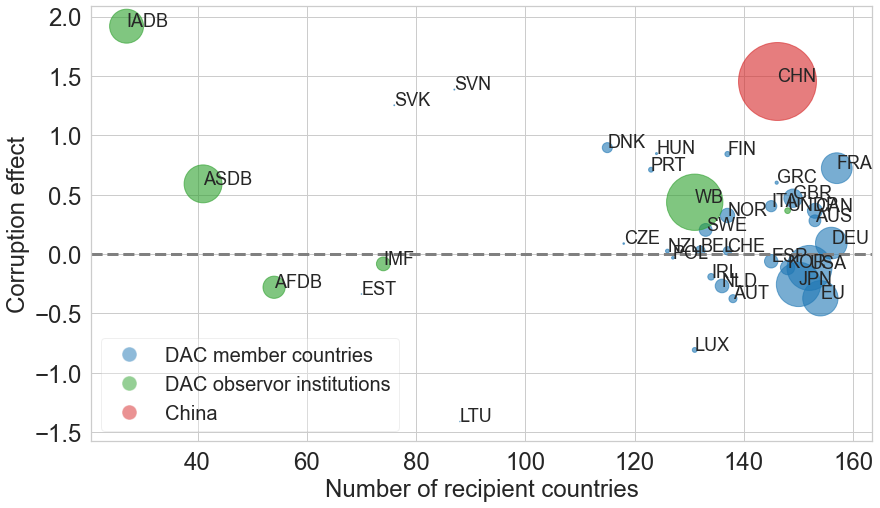

In [39]:
filtered_data2 = data_donor_by_donor[data_donor_by_donor['coef'] < 100]

# Define more subtle colors with transparency for each donor group using hex color codes
colors = {1: '#1F77B480', 2: '#2CA02C80', 3: '#D6272880'}  # Hex colors with transparency

# Plot coef against rec_id with annotations for donor_iso and size representing total_supply
plt.figure(figsize=(14, 8))

# Scatter plot for each group with custom labels
group1_data = filtered_data2[filtered_data2['donor_group'] == 1]
plt.scatter(group1_data['rec_id'], group1_data['coef'], 
            s=group1_data['total_supply'] / 200000000, 
            alpha=0.6, label='DAC member countries', color=colors[1])

group2_data = filtered_data2[filtered_data2['donor_group'] == 2]
plt.scatter(group2_data['rec_id'], group2_data['coef'], 
            s=group2_data['total_supply'] / 200000000, 
            alpha=0.6, label='DAC observor institutions', color=colors[2])

group3_data = filtered_data2[filtered_data2['donor_group'] == 3]
plt.scatter(group3_data['rec_id'], group3_data['coef'], 
            s=group3_data['total_supply'] / 200000000, 
            alpha=0.6, label='China', color=colors[3])

# Annotation
for i in range(filtered_data2.shape[0]):
    plt.text(filtered_data2['rec_id'].iloc[i], filtered_data2['coef'].iloc[i], 
             filtered_data2['donor_iso'].iloc[i], fontsize=18)

# Reference line at 0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=3)

# Labels and title
plt.xlabel('Number of recipient countries', fontsize=24)
plt.ylabel('Corruption effect', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=15),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=15),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[3], markersize=15)]
plt.legend(custom_handles, ['DAC member countries', 'DAC observor institutions', 'China'],loc='lower left', fontsize=20, framealpha=0.3)
plt.grid(True)
plt.show()

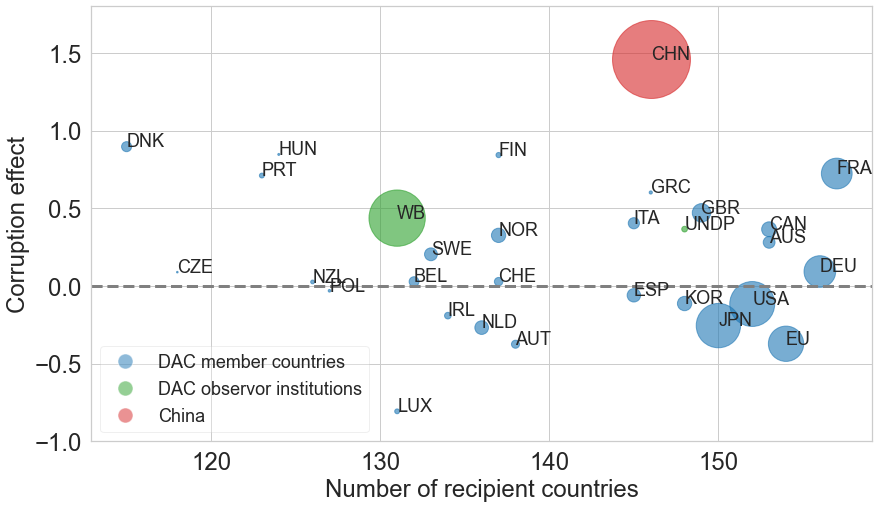

In [33]:
filtered_data = data_donor_by_donor[data_donor_by_donor['rec_id'] > 110]

# Define more subtle colors with transparency for each donor group using hex color codes
colors = {1: '#1F77B480', 2: '#2CA02C80', 3: '#D6272880'}  # Hex colors with transparency

# Plot coef against rec_id with annotations for donor_iso and size representing total_supply
plt.figure(figsize=(14, 8))

# Scatter plot for each group with custom labels
group1_data = filtered_data[filtered_data['donor_group'] == 1]
plt.scatter(group1_data['rec_id'], group1_data['coef'], 
            s=group1_data['total_supply'] / 200000000, 
            alpha=0.6, label='DAC member countries', color=colors[1])

group2_data = filtered_data[filtered_data['donor_group'] == 2]
plt.scatter(group2_data['rec_id'], group2_data['coef'], 
            s=group2_data['total_supply'] / 200000000, 
            alpha=0.6, label='DAC observor institutions', color=colors[2])

group3_data = filtered_data[filtered_data['donor_group'] == 3]
plt.scatter(group3_data['rec_id'], group3_data['coef'], 
            s=group3_data['total_supply'] / 200000000, 
            alpha=0.6, label='China', color=colors[3])

# Annotation
for i in range(filtered_data.shape[0]):
    plt.text(filtered_data['rec_id'].iloc[i], filtered_data['coef'].iloc[i], 
             filtered_data['donor_iso'].iloc[i], fontsize=18)

# Reference line at 0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=3)

# Labels and title
plt.xlabel('Number of recipient countries', fontsize=24)
plt.ylabel('Corruption effect', fontsize=24)
plt.ylim([-1, 1.8])  # Adjust y-axis limit to ensure CHN is not cut off
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=15),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2], markersize=15),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[3], markersize=15)]
plt.legend(custom_handles, ['DAC member countries', 'DAC observor institutions', 'China'],loc='lower left', fontsize=18, framealpha=0.3)
plt.grid(True)
plt.show()

In [4]:
xls = pd.ExcelFile('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\monitoring_intensity_new.xlsx')

# Load Sheet 3 from the Excel file
sheet3_df = pd.read_excel(xls, sheet_name='Sheet3')

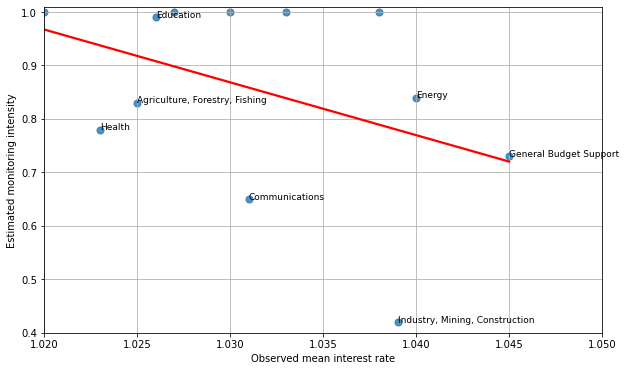

In [14]:
# Create a scatter plot with a fitted line, no confidence intervals
plt.figure(figsize=(10, 6))

# Scatter plot without confidence intervals and with sector labels
sns.regplot(x='R_c', y='psi_c_real', data=sheet3_df, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)

# Annotate each point with sector names, but only if psi_c_real is not equal to 1
for i in range(len(sheet3_df)):
    if sheet3_df['psi_c_real'][i] != 1:
        plt.text(sheet3_df['R_c'][i], sheet3_df['psi_c_real'][i], sheet3_df['sector.1'][i], fontsize=9)

# Set labels and title
plt.xlabel('Observed mean interest rate')
plt.ylabel('Estimated monitoring intensity')
plt.xlim(1.02, 1.05)  # Example range for x-axis
plt.ylim(0.4, 1.01)    # Example range for y-axis
# Show plot
plt.grid(True)
plt.show()

In [2]:
data = pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\tale_two_countries.dta')

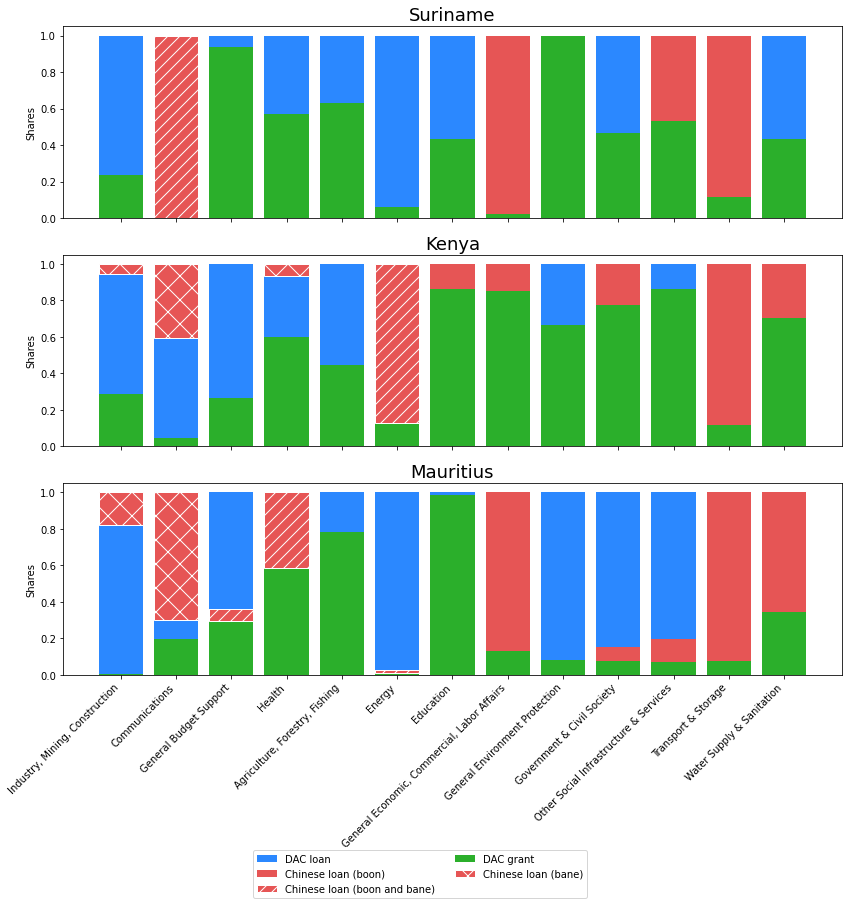

In [13]:
# Filter the data for each country
suriname_data = data[data['iso_code'] == 'SUR']
kenya_data = data[data['iso_code'] == 'KEN']
mauritius_data = data[data['iso_code'] == 'MUS']

# Define the color map for different shares
share_color_map_brighter = {
    'Dtilde': '#2B88FF',  # Brighter Blue for DAC loan
    'Ctilde': '#E65555',  # Brighter Crimson for China loan
    'Gtilde': '#2BAF2B'   # Brighter Green for Grant
}

# Function to create the stacked figure with Suriname, Kenya, and Mauritius in the desired order
def plot_stacked_sector_commitments_custom_order(suriname_data, kenya_data, mauritius_data):
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    # List of sectors that will have an X-shape pattern for red bars with psi_c < 0.95
    custom_pattern_sectors_kenya = ['Industry, Mining, Construction', 'Communications', 'Health']
    custom_pattern_sectors_mauritius = ['Industry, Mining, Construction', 'Communications']

    # Plotting function for each country
    def plot_country_data(country_data, ax, country_name, custom_sectors):
        country_data_sorted = country_data.sort_values('psi_c')
        sectors = country_data_sorted['sector']
        bar_data = []
        psi_c_values = country_data_sorted['psi_c']

        for idx, row in country_data_sorted.iterrows():
            components = row['sec_fin_bad'].split('_')
            sector_stack = []
            for comp in reversed(components):
                if comp == 'Dtilde':
                    sector_stack.append((row['share_D'], comp))  # Share for DAC loans
                elif comp == 'Ctilde':
                    sector_stack.append((row['share_C'], comp))  # Share for China loans
                elif comp == 'Gtilde':
                    sector_stack.append((row['share_G'], comp))  # Share for grants
            bar_data.append(sector_stack)

        for i, sector_stack in enumerate(bar_data):
            bottom = 0
            for share, comp in sector_stack:
                if not pd.isnull(share):
                    if comp == 'Ctilde':
                        if psi_c_values.iloc[i] < 0.95 and sectors.iloc[i] in custom_sectors:
                            # Apply X-shape pattern for red bars in specific sectors with psi_c < 0.95
                            ax.bar(i, share, bottom=bottom, color=share_color_map_brighter[comp], hatch='x', edgecolor='white')
                        elif psi_c_values.iloc[i] < 0.95:
                            # Reverse the pattern with red fill and white lines for psi_c < 0.95
                            ax.bar(i, share, bottom=bottom, color=share_color_map_brighter[comp], hatch='//', edgecolor='white')
                        else:
                            # Regular red bar for sectors with psi_c >= 0.95
                            ax.bar(i, share, bottom=bottom, color=share_color_map_brighter[comp])
                    else:
                        # Normal filling for other bars
                        ax.bar(i, share, bottom=bottom, color=share_color_map_brighter[comp])
                    bottom += share

        ax.set_ylabel('Shares')
        ax.set_title(f'{country_name}',fontsize=18)
        ax.set_xticks(np.arange(len(sectors)))
        ax.set_xticklabels(sectors, rotation=45, ha='right')

    # Plot for Suriname
    plot_country_data(suriname_data, axes[0], 'Suriname', [])

    # Plot for Kenya
    plot_country_data(kenya_data, axes[1], 'Kenya', custom_pattern_sectors_kenya)

    # Plot for Mauritius
    plot_country_data(mauritius_data, axes[2], 'Mauritius', custom_pattern_sectors_mauritius)

    # Customize x-axis for the last subplot
    #axes[2].set_xlabel('Sectors')

    # Add a proper legend with pattern and color distinctions
    handles = [
        Patch(facecolor=share_color_map_brighter['Dtilde'], label='DAC loan'),  # DAC Loan
        Patch(facecolor=share_color_map_brighter['Ctilde'], label='Chinese loan (boon)'),  # Regular China Loan
        Patch(facecolor=share_color_map_brighter['Ctilde'], hatch='//', edgecolor='white', label='Chinese loan (boon and bane)'),  # Diagonal China loan
        Patch(facecolor=share_color_map_brighter['Gtilde'], label='DAC grant'),  # Grant
        Patch(facecolor=share_color_map_brighter['Ctilde'], hatch='x', edgecolor='white', label='Chinese loan (bane)')  # X-shape China loan 
    ]
    fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout()
    plt.show()

# Plot stacked figure with Suriname, Kenya, and Mauritius order, and legends below sector names
plot_stacked_sector_commitments_custom_order(suriname_data, kenya_data, mauritius_data)

In [15]:
xls = pd.ExcelFile('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\consumption_good_percent.xlsx')

# Load Sheet 3 from the Excel file
df = pd.read_excel(xls)

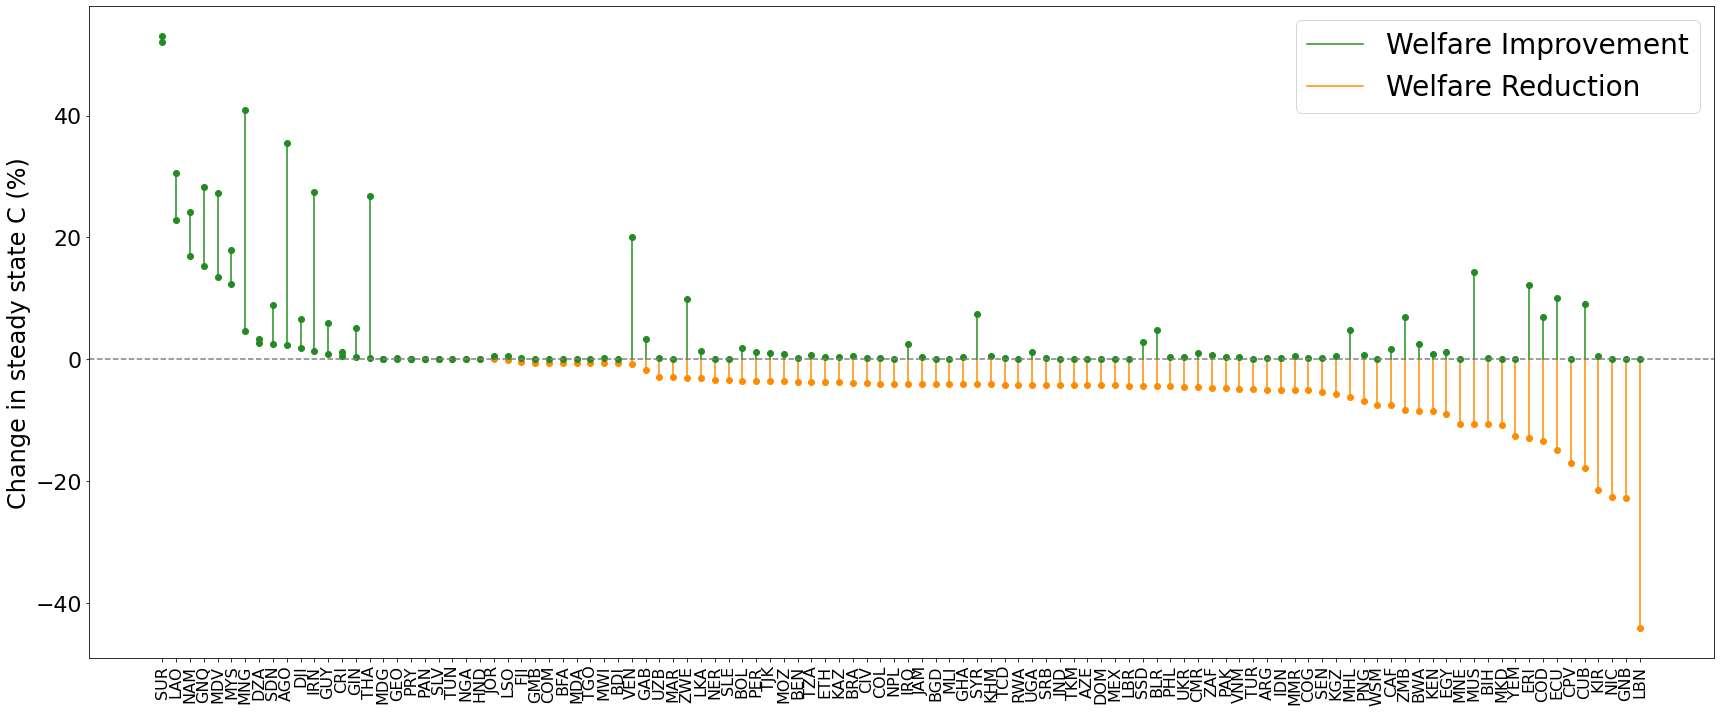

In [21]:
# Sort the dataframe by 'China_effect_bad' in descending order
df_sorted = df.sort_values(by='China_effect_bad', ascending=False)

# Filter out rows where 'C_ss_bad' is negative
df_filtered = df_sorted[df_sorted['C_ss_bad'] >= 0]

# Set up the figure and axis with adjusted X-axis font size and tilted labels
plt.figure(figsize=(24,10))

# Initialize label flags to prevent duplicate legends
welfare_improvement_label = True
welfare_reduction_label = True

# Plot the intervals (as vertical lines) with blue and red dots/lines
for idx, row in df_filtered.iterrows():
    # Color the line red if any part of it is below zero, otherwise blue
    if row['China_effect_bad'] < 0:
        plt.plot([row['iso_code'], row['iso_code']], [row['China_effect_bad'], 0], color='#FF8C00', 
                 label='Welfare Reduction' if welfare_reduction_label else "")  # Segment below zero in red
        plt.plot([row['iso_code'], row['iso_code']], [0, row['China_effect']], color='#228B22', 
                 label='Welfare Improvement' if welfare_improvement_label else "")  # Segment above zero in blue
        plt.plot(row['iso_code'], row['China_effect_bad'], marker='o', color='#FF8C00')  # Bottom point (China_effect_bad) in red
        welfare_reduction_label = False
    else:
        plt.plot([row['iso_code'], row['iso_code']], [row['China_effect_bad'], row['China_effect']], color='#228B22', 
                 label='Welfare Improvement' if welfare_improvement_label else "")
        plt.plot(row['iso_code'], row['China_effect_bad'], marker='o', color='#228B22')  # Bottom point (China_effect_bad) in blue
        welfare_improvement_label = False
    
    # Top point always blue
    plt.plot(row['iso_code'], row['China_effect'], marker='o', color='#228B22')  # Top point (China_effect) in blue

# Add a dashed reference line at y=0
plt.axhline(y=0, color='gray', linestyle='--')

# Add labels and title
#plt.xlabel('ISO Code (Sorted by China Effect Bad)')
plt.ylabel('Change in steady state C (%)', fontsize=24)
plt.xticks(rotation=90, ha='center', fontsize=16)  # Adjust X-axis label font size and tilt
plt.yticks(fontsize=22)
# Add legend for the lines
plt.legend(fontsize=28)

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
data = pd.read_stata('C:\\Users\\chans\\Desktop\\UpdatedEmpirics\\PPD2_histogram.dta')

In [5]:
# Drop any rows with missing data in 'rating' or 'sector' columns
data_filtered = data[['rating', 'sector']].dropna()

# Define bin edges with 0.2 width, covering the typical range of ratings
bin_edges = np.arange(data_filtered['rating'].min(), data_filtered['rating'].max() + 0.5, 0.2)


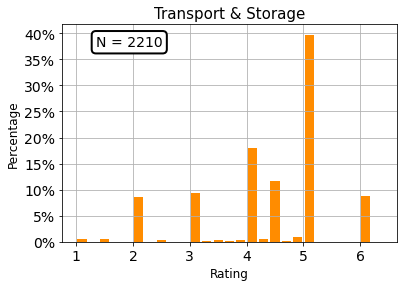

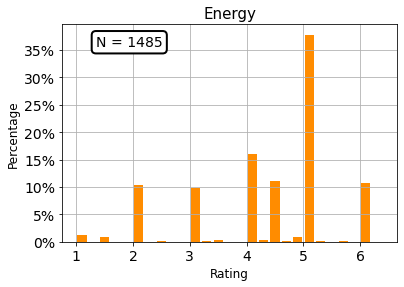

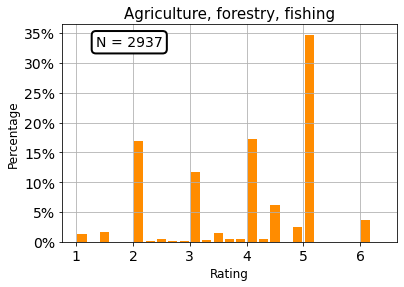

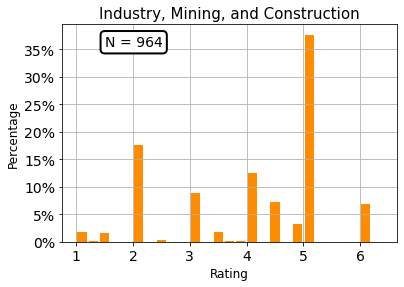

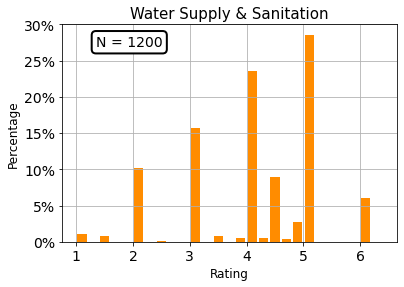

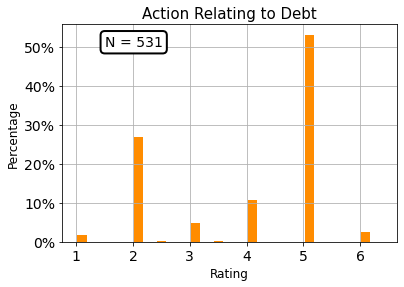

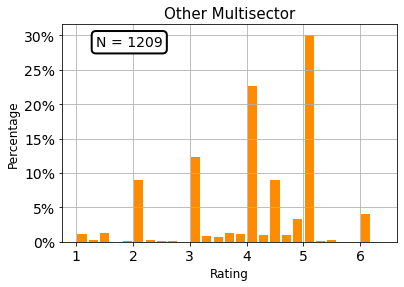

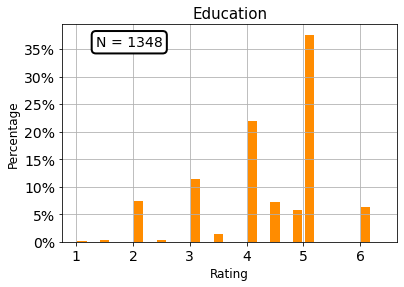

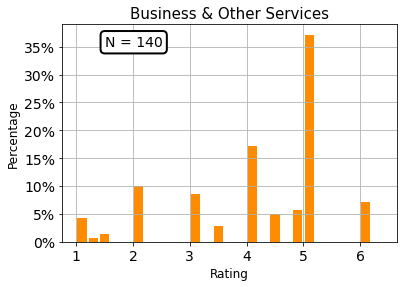

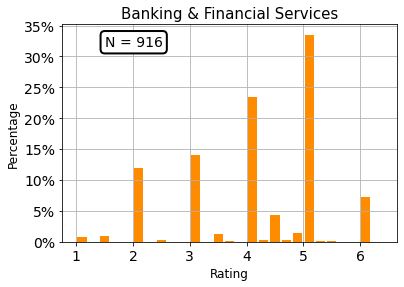

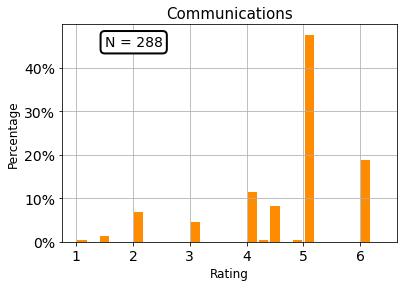

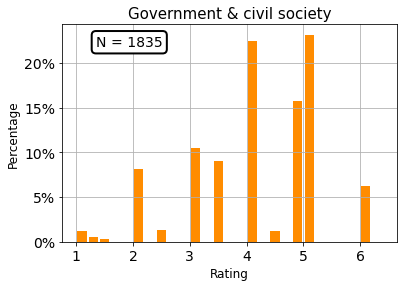

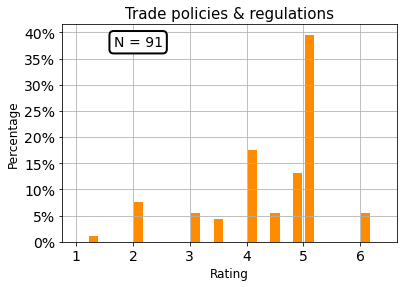

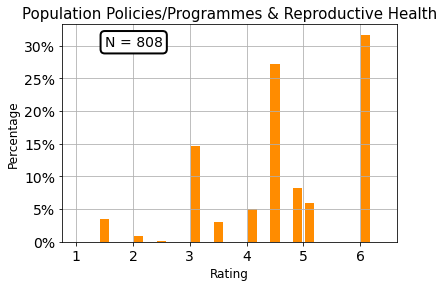

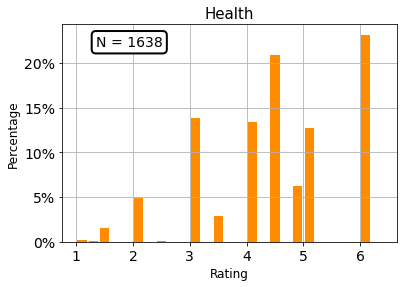

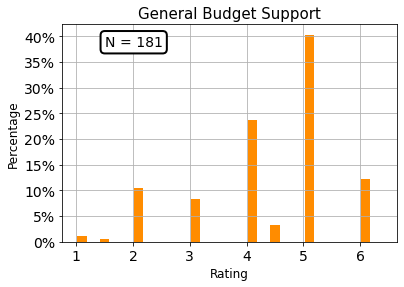

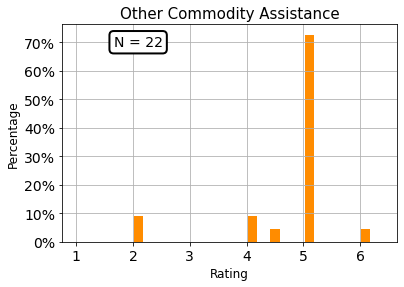

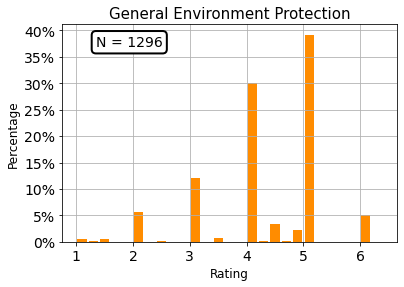

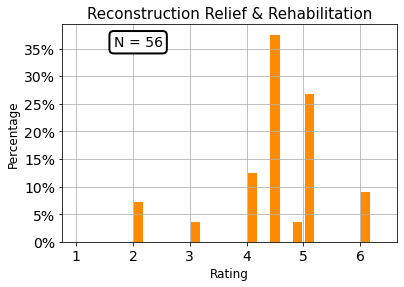

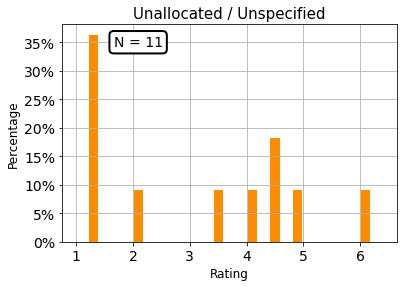

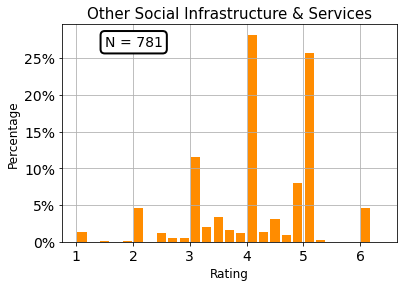

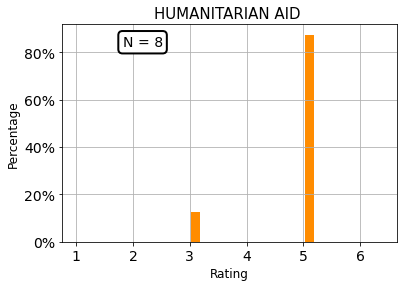

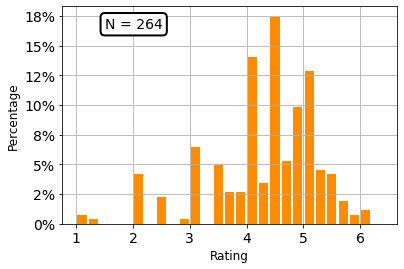

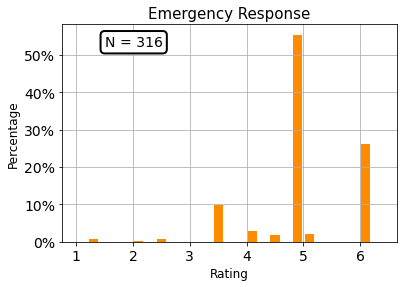

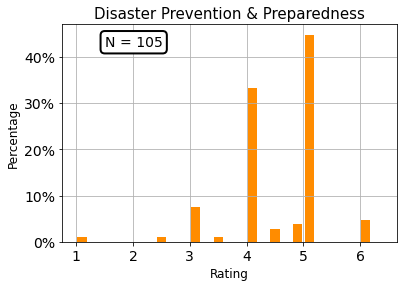

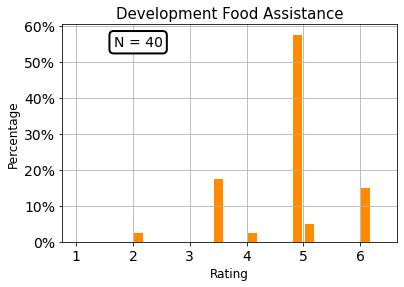

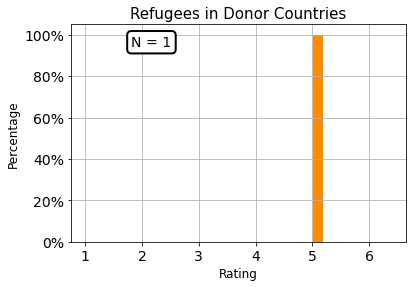

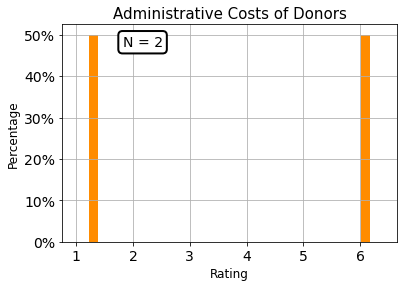

In [27]:
for sector in data_filtered['sector'].unique():
    sector_data = data_filtered[data_filtered['sector'] == sector]['rating']
    
    # Create a new figure for each sector
    plt.figure(figsize=(6, 4))
    
    # Plot the histogram with y-axis as percentage of total counts
    n, bins, patches = plt.hist(sector_data, bins=bin_edges, weights=np.ones(len(sector_data)) / len(sector_data), rwidth=0.8, align='mid', color='#FF8C00')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))  # Format y-axis to show percentage

    # Annotate the number of observations in the top right corner
    plt.annotate(f'N = {len(sector_data)}', xy=(0.3, 0.95), xycoords='axes fraction', fontsize=14,
                 horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", lw=2))

    plt.title(f'{sector}',fontsize=15)
    plt.xlabel('Rating',fontsize=12)
    plt.ylabel('Percentage',fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # Show the plot
    plt.show()

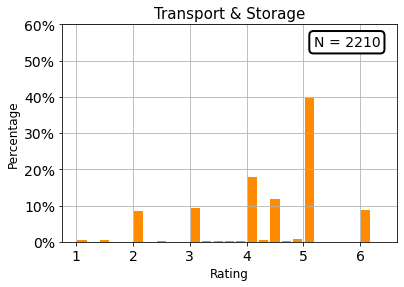

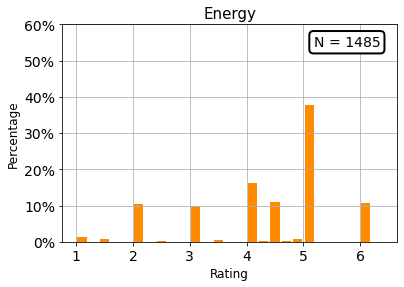

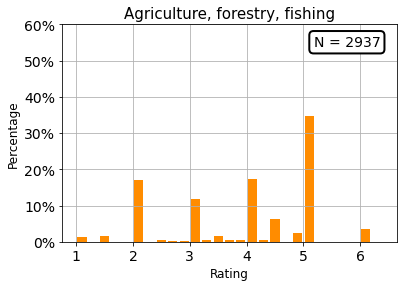

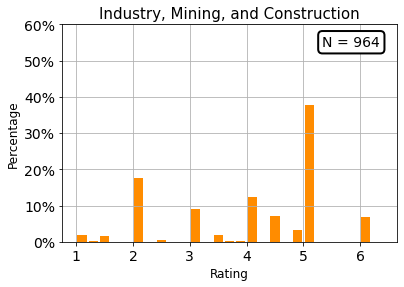

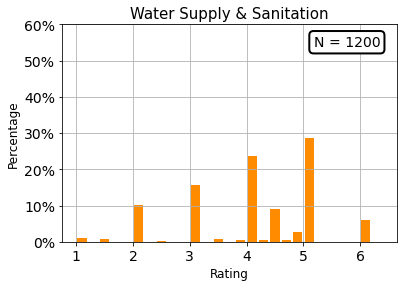

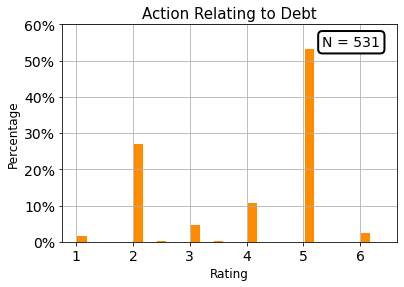

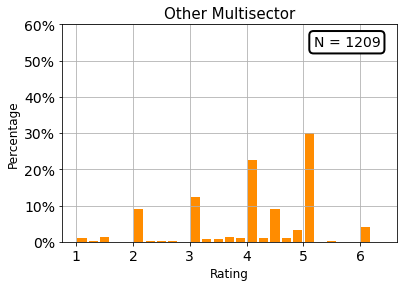

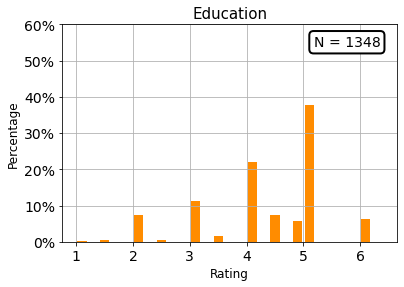

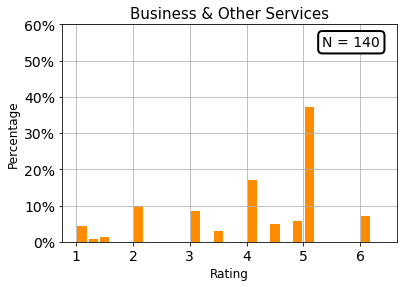

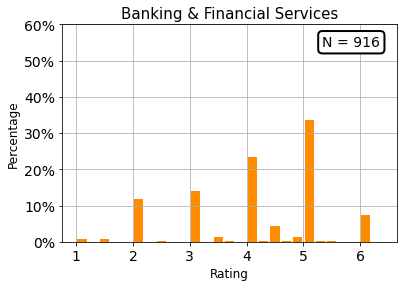

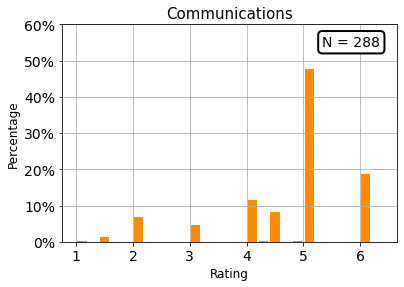

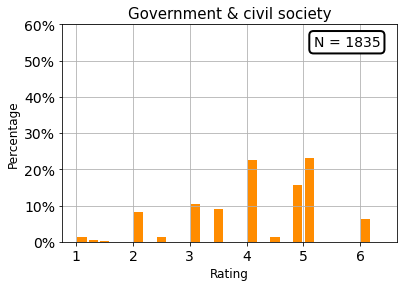

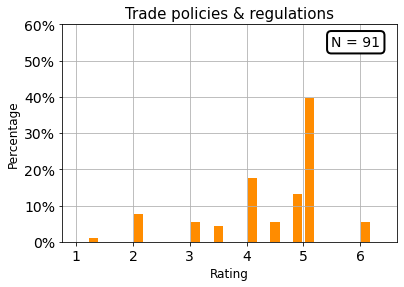

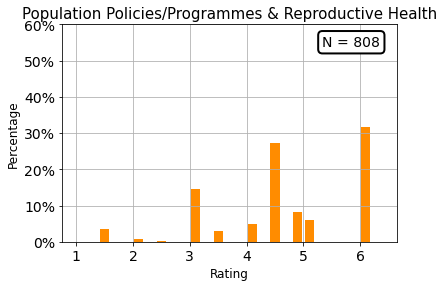

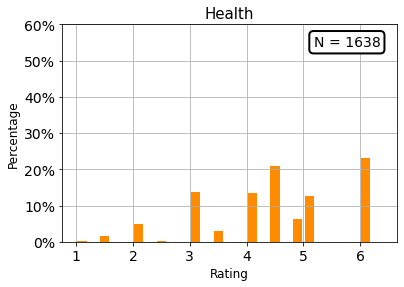

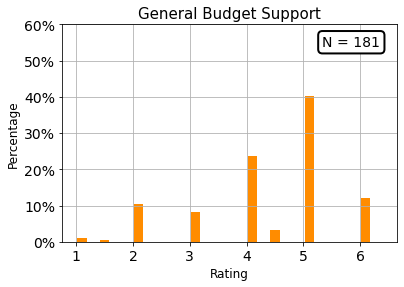

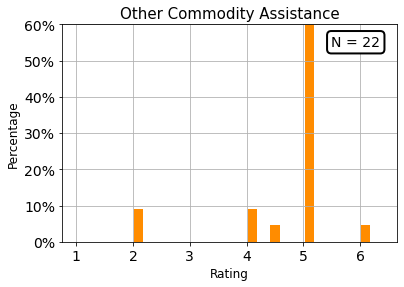

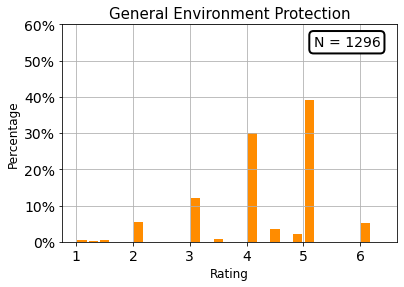

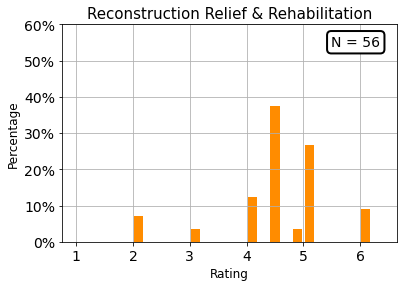

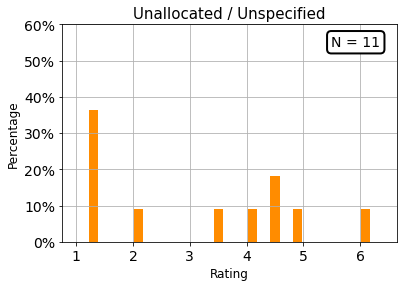

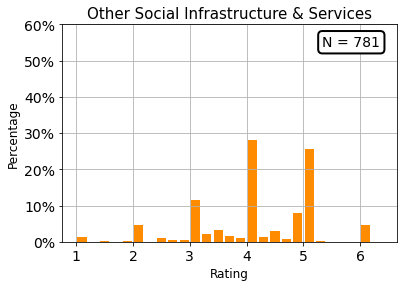

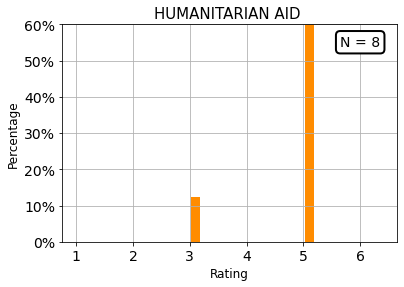

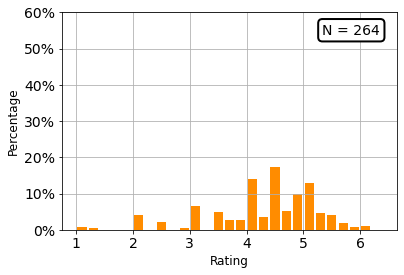

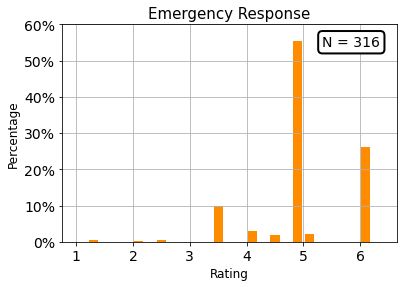

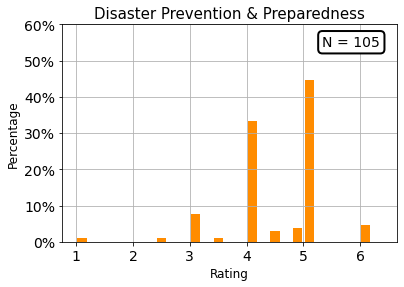

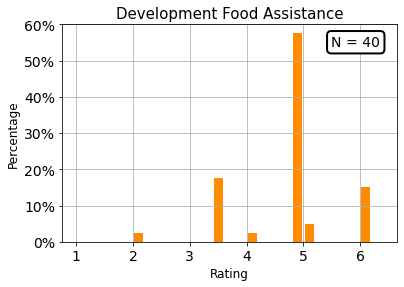

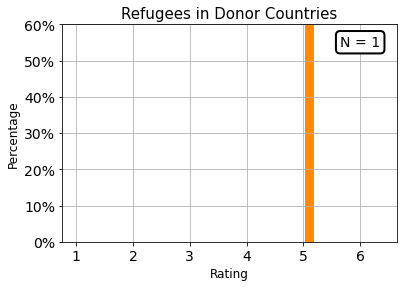

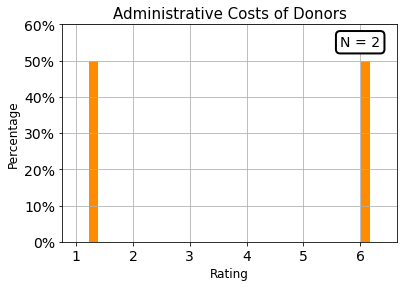

In [9]:
# Assuming 'data_filtered' and 'bin_edges' are defined as per your earlier script

# Step 1: Calculate the maximum percentage value
max_percentage = 0
for sector in data_filtered['sector'].unique():
    sector_data = data_filtered[data_filtered['sector'] == sector]['rating']
    counts, _ = np.histogram(sector_data, bins=bin_edges, weights=np.ones(len(sector_data)) / len(sector_data))
    max_percentage = max(max_percentage, counts.max())

max_percentage = max_percentage*0.6  # Convert to percentage

# Step 2: Plot each histogram with the uniform y-axis range
for sector in data_filtered['sector'].unique():
    sector_data = data_filtered[data_filtered['sector'] == sector]['rating']
    
    plt.figure(figsize=(6, 4))
    
    # Plot the histogram with y-axis as percentage of total counts
    n, bins, patches = plt.hist(sector_data, bins=bin_edges, weights=np.ones(len(sector_data)) / len(sector_data),
                                rwidth=0.8, align='mid', color='#FF8C00')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))  # Format y-axis to show percentage

    # Set uniform y-axis range
    plt.ylim(0, max_percentage)

    # Annotate the number of observations in the top right corner
    plt.annotate(f'N = {len(sector_data)}', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14,
                 horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", lw=2))
    
    plt.title(f'{sector}', fontsize=15)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()